<a href="https://colab.research.google.com/github/HasunFur/Machine-Learning/blob/main/AmazonECHOReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import pickle
import re

In [16]:
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t', quoting=3 )
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
print(f"Feature names:{df.columns.values}")

Feature names:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [18]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [19]:
df[df['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [23]:
df.shape

(3149, 5)

In [24]:
df['length'] = df['verified_reviews'].apply(len)

In [25]:
df.head(5)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [28]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [29]:
len(df)

3149

In [31]:
df.value_counts('rating')

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [32]:
# Here 5,4,3 are considered as positive ratings and 1,2 are negative ratings

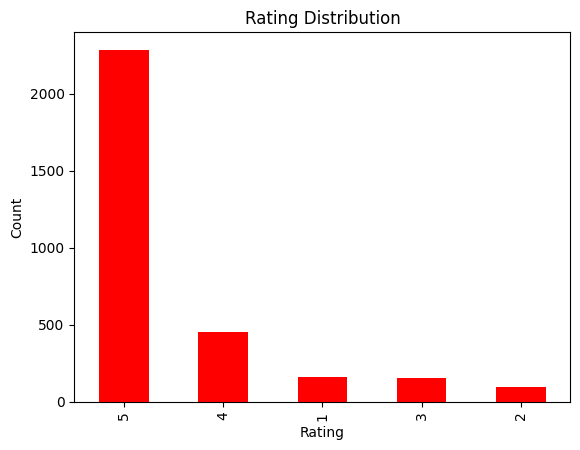

In [33]:
df['rating'].value_counts().plot(kind='bar', color='red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [34]:
print(f'Rating in %: \n{df["rating"].value_counts(normalize=True)*100}')

Rating in %: 
rating
5    72.594474
4    14.449031
1     5.112734
3     4.826929
2     3.016831
Name: proportion, dtype: float64


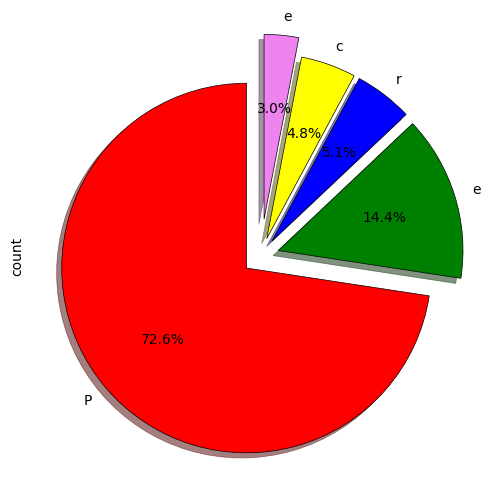

In [45]:
fig = plt.figure(figsize=(10,6))

colors = ('red', 'green', 'blue', 'yellow', 'violet')

explode = (0.1, 0.1, 0.1, 0.1, 0.2)

tags = df['rating'].value_counts()/df.shape[0]

tags.plot(kind='pie', explode=explode, labels='Percentage wise Distribution', colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={ 'linewidth' : 0.5, 'edgecolor' : 'black' })

plt.show()


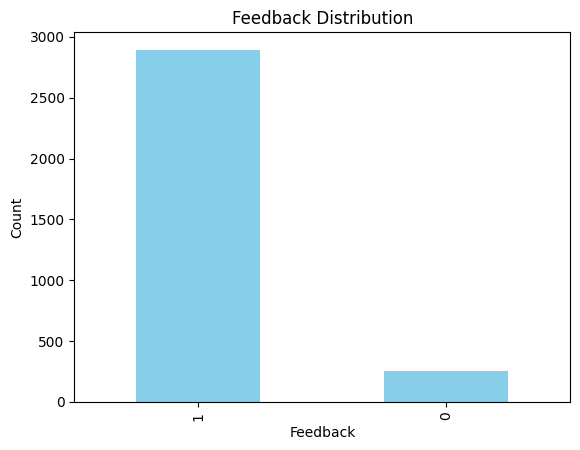

In [81]:
df['feedback'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Feedback Distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [47]:
df['feedback'].value_counts(normalize=True)*100

feedback
1    91.870435
0     8.129565
Name: proportion, dtype: float64

In [53]:
df[df['feedback']==0].iloc[10]['verified_reviews']

'Item no longer works after just 5 months of use. Will not connect to wifi and unresponsive to reset requests.'

In [54]:
df[df['feedback']==1].iloc[10]['verified_reviews']

'"I sent it to my 85 year old Dad, and he talks to it constantly."'

In [55]:
# 0 is -ve feedback, 1 is +ve feedback

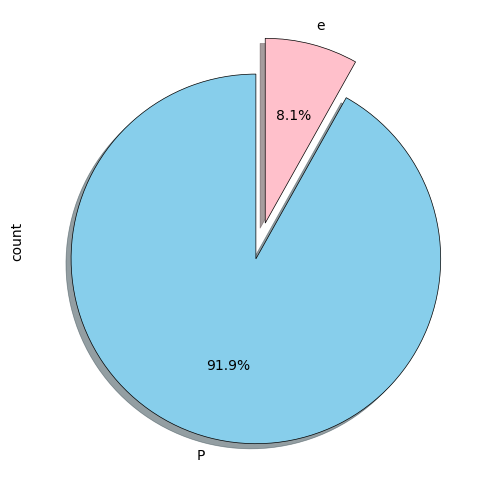

In [85]:
fig = plt.figure(figsize=(10,6))

colors = ('skyblue', 'Pink')

explode = (0.1, 0.1)

tags = df['feedback'].value_counts()/df.shape[0]

tags.plot(kind='pie', explode=explode, labels='Percentage wise Distribution of feedback', colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={ 'linewidth' : 0.5, 'edgecolor' : 'black' })

plt.show()


In [64]:
df['feedback'].value_counts(normalize=True)*100

feedback
1    91.870435
0     8.129565
Name: proportion, dtype: float64

In [65]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

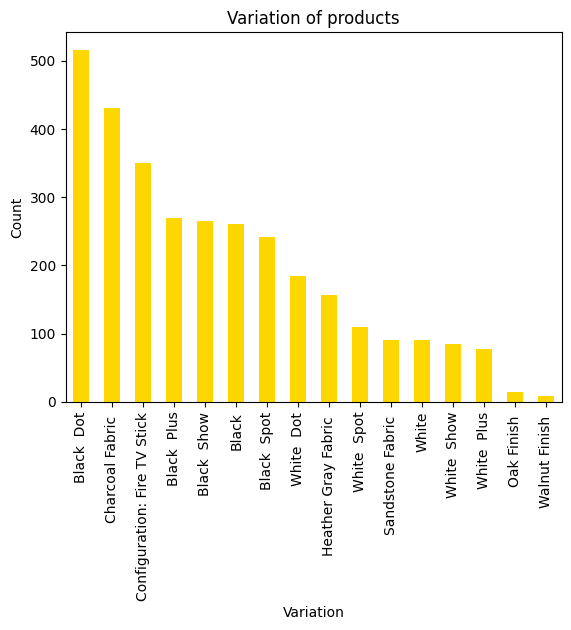

In [68]:
df['variation'].value_counts().plot(kind='bar',color='Gold')
plt.title('Variation of products')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [70]:
df['variation'].value_counts(normalize=True)*100

variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: proportion, dtype: float64

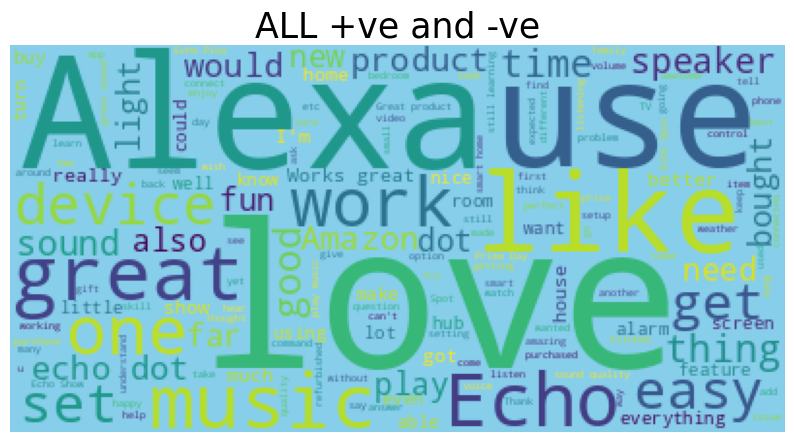

In [86]:
reviews = " ".join([review for review in df['verified_reviews']])

wc = WordCloud(background_color='skyblue', max_words=1000, stopwords=STOPWORDS)

plt.figure(figsize=(10,7))
plt.imshow(wc.generate(reviews))
plt.title('ALL +ve and -ve', fontsize=25)
plt.axis('off')
plt.show()

In [75]:
neg_reviews = " ".join([review for review in df['verified_reviews'][df['feedback']==0]])
neg_reviews = neg_reviews.lower()

pos_reviews = " ".join([review for review in df['verified_reviews'][df['feedback']==1]])
pos_reviews = pos_reviews.lower()

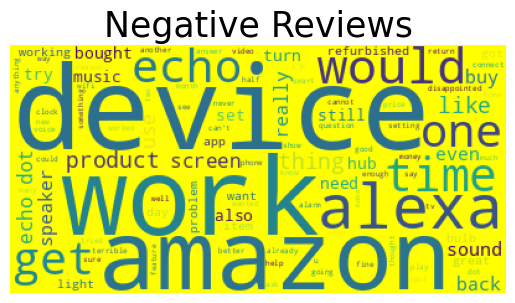

In [87]:
wc = WordCloud(background_color='yellow', max_words=100, stopwords=STOPWORDS)
plt.imshow(wc.generate(neg_reviews))
plt.title('Negative Reviews', fontsize=25)
plt.axis('off')
plt.show()

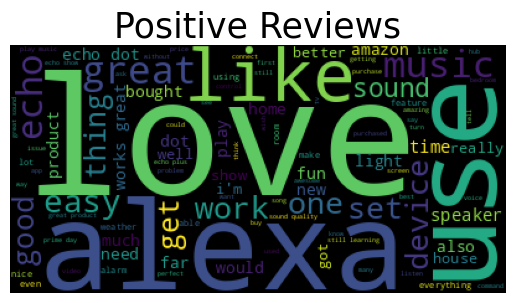

In [88]:
wc = WordCloud(background_color='black', max_words=100, stopwords=STOPWORDS)
plt.imshow(wc.generate(pos_reviews))
plt.title('Positive Reviews', fontsize=25)
plt.axis('off')
plt.show()

In [92]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = [stemmer.stem(word) for word in review.split() if word not in set(stopwords.words('english'))]
    # Join the words back into a single string and add to the corpus
  corpus.append(' '.join(review))


In [93]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [94]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2204, 2500)
y_train shape: (2204,)
X_test shape: (945, 2500)
y_test shape: (945,)


In [100]:
scaler = MinMaxScaler()
X_train_SC = scaler.fit_transform(X_train)
X_test_SC = scaler.transform(X_test)

In [101]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_SC, y_train)

RandomForestClassifier()

In [102]:
y_pred = model_rf.predict(X_test_SC)

In [104]:
print(f'Training Accuracy:', model_rf.score(X_train_SC, y_train))
print(f'Testing Accuracy:', model_rf.score(X_test_SC, y_test))

Training Accuracy: 0.9936479128856625
Testing Accuracy: 0.9195767195767196


In [105]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 25,  67],
       [  9, 844]])

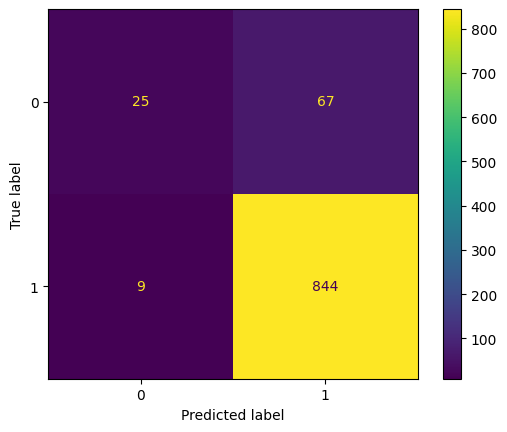

In [106]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [108]:
from xgboost import XGBClassifier
modelXG = XGBClassifier()
modelXG.fit(X_train_SC, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
print(f'Training Accuracy:', modelXG.score(X_train_SC, y_train))
print(f'Testing Accuracy:', modelXG.score(X_test_SC, y_test))

Training Accuracy: 0.9777676950998185
Testing Accuracy: 0.9195767195767196


In [111]:
y_pred_2 = modelXG.predict(X_test_SC)

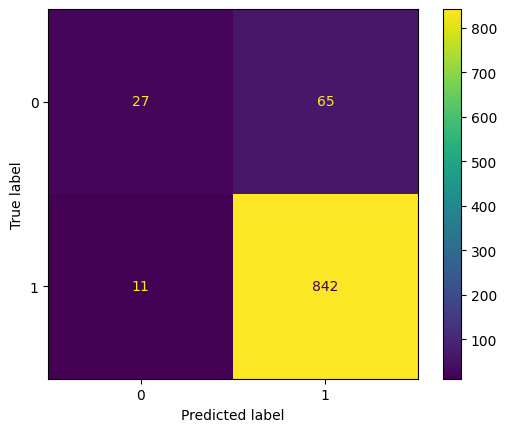

In [112]:
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2_display = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=modelXG.classes_)
cm_2_display.plot()
plt.show()

In [113]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_SC, y_train)

DecisionTreeClassifier()

In [114]:
print(f'Training Accuracy:', model_dt.score(X_train_SC, y_train))
print(f'Testing Accuracy:', model_dt.score(X_test_SC, y_test))

Training Accuracy: 0.9936479128856625
Testing Accuracy: 0.9142857142857143


In [116]:
y_pred_3 = model_dt.predict(X_test_SC)

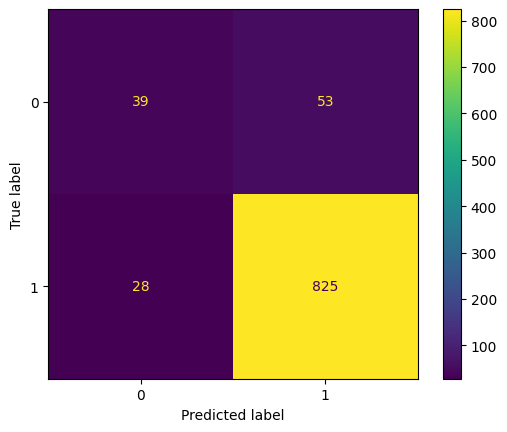

In [117]:
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_3_display = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=model_dt.classes_)
cm_3_display.plot()
plt.show()